# Se entrena con valores pseudo aleatorios de $A, f, t$ y el correspondiente
# $ x = A\cos{2 \pi f t}$

# Input:
- $A$
- $f$
- $t$

MSE (Linear Perceptron): 1.3904
MSE (ReLU Perceptron): 1.2400
MSE (Tanh Perceptron): 1.5336
MSE (Sigmoid Perceptron): 1.2400
MSE (LeakyReLU Perceptron): 1.2446
Linear Perceptron: Weights = [-0.38714735 -0.01223748 -0.03029298], Bias = 0.6575
ReLU Perceptron: Weights = [ -4.44956318  -3.42482946 -11.52822502], Bias = -0.8756
Tanh Perceptron: Weights = [-0.13901998  0.39142195  0.03806462], Bias = -0.7657
Sigmoid Perceptron: Weights = [ -4.48615804  -3.07364972 -11.87372163], Bias = -1.4682
LeakyReLU Perceptron: Weights = [-3.06174819 -0.28074592 -2.57867531], Bias = -0.3061


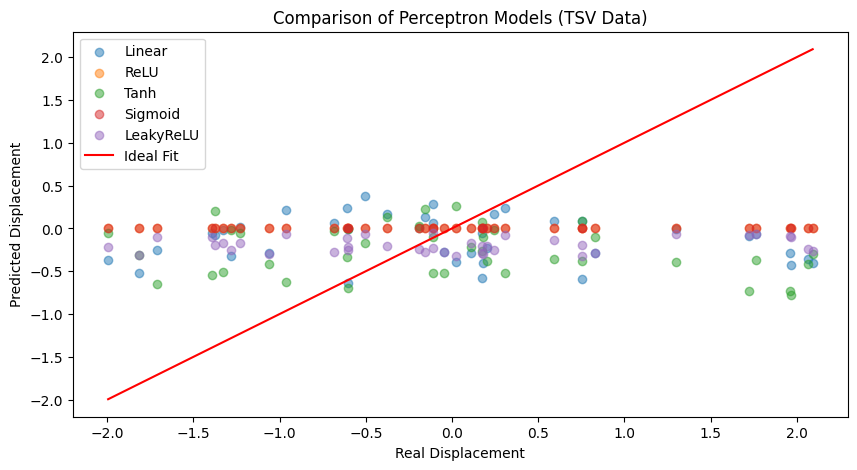

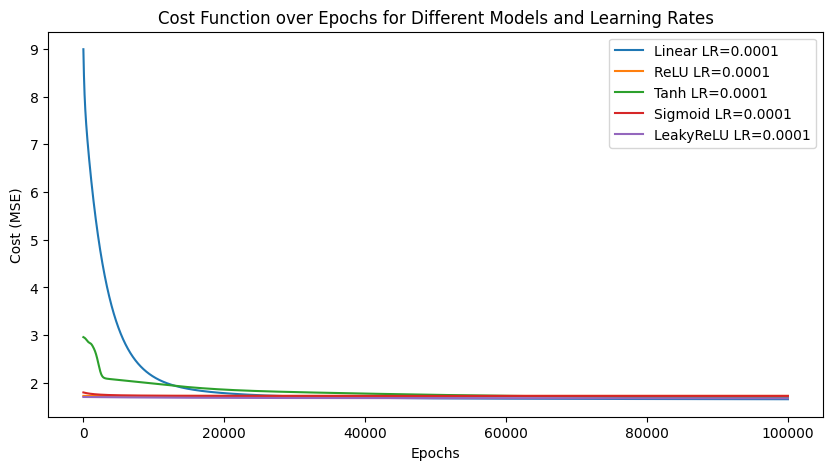

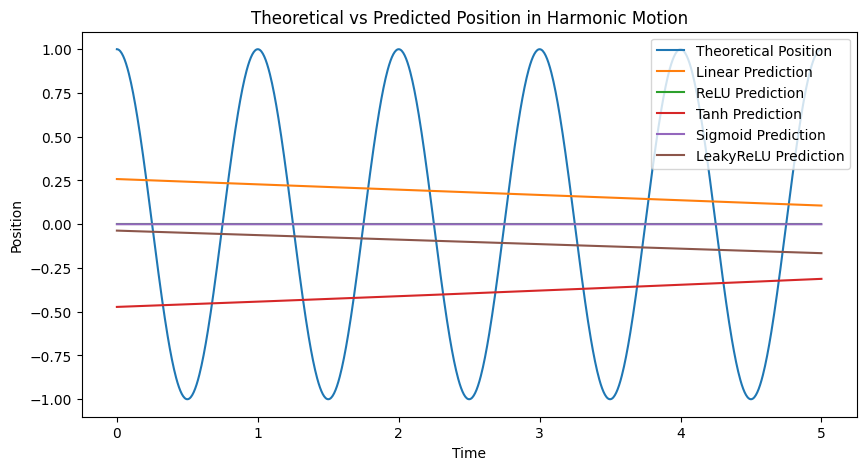

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, 1:4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=100000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}
  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []
    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)
      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse
        cost_history[lr] = costs
    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

X, y = load_data("./Data/train.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

activations = {"Linear": lambda x: x, "ReLU": relu, "Tanh": np.tanh, "Sigmoid": sigmoid, "LeakyReLU": leaky_relu}
lr_values = [0.0001, 0.001, 0.01, 0.1]

models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

predictions = {name: perceptron_predict(X_test, w, b, act) for name, (w, b), act in zip(models, models.values(), activations.values())}
mse_values = {name: np.mean((y_test - y_pred) ** 2) for name, y_pred in predictions.items()}

for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

amplitude, frequency = 1, 1
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  for lr, costs in history.items():
    plt.plot(costs, label=f"{name} LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Cost Function over Epochs for Different Models and Learning Rates")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  y_sim = perceptron_predict(X_sim, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores pseudo aleatoreos de $A, f, t, m, t$ y al correspondiente
# $x = A\cos{2\pi f t}$

# Input:
- $A$
- $f$
- $t$
- $m$

MSE (Linear Perceptron): 1.3985
MSE (ReLU Perceptron): 1.2400
MSE (Tanh Perceptron): 1.5177
MSE (Sigmoid Perceptron): 1.2400
MSE (LeakyReLU Perceptron): 1.2680
Linear Perceptron: Weights = [-0.01743189 -0.35738725  0.018025   -0.0233647 ], Bias = 0.6132
ReLU Perceptron: Weights = [-11.35496762  -6.03720381  -2.35069681 -10.95906581], Bias = -1.7439
Tanh Perceptron: Weights = [ 0.03147163 -0.07257219  0.37454308  0.04063664], Bias = -1.0409
Sigmoid Perceptron: Weights = [-13.15571001  -4.94249279  -2.12892147 -12.24475843], Bias = 0.5297
LeakyReLU Perceptron: Weights = [-1.76800633 -1.68361447 -0.99661658 -1.32746505], Bias = -0.1729


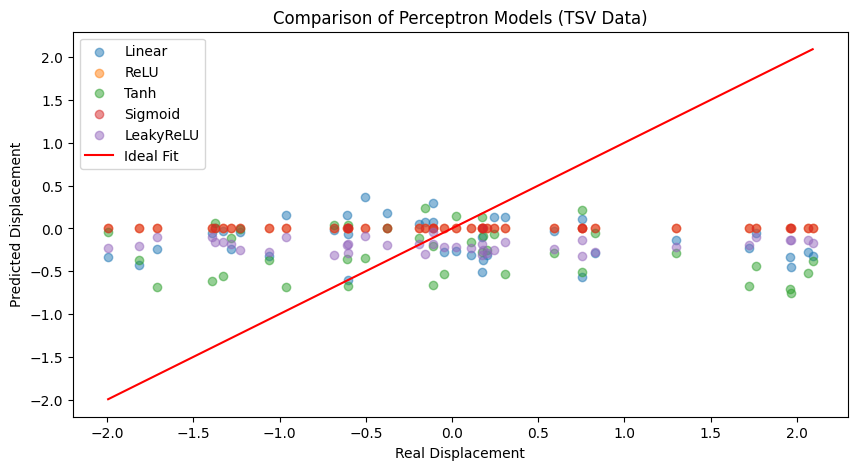

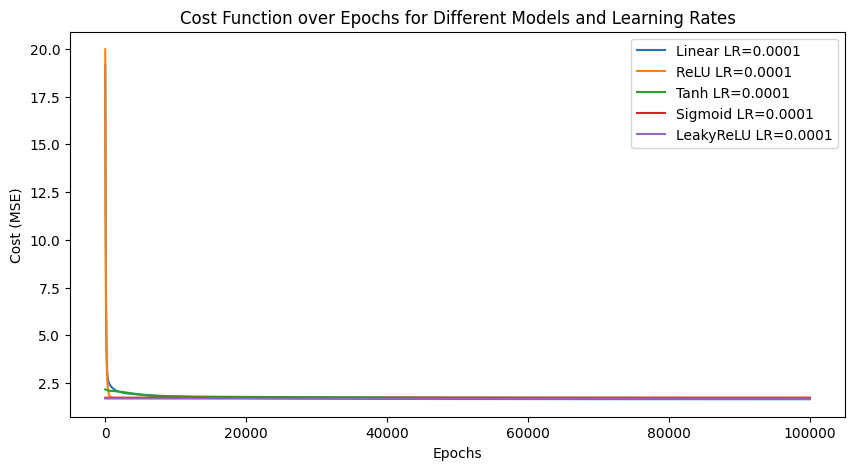

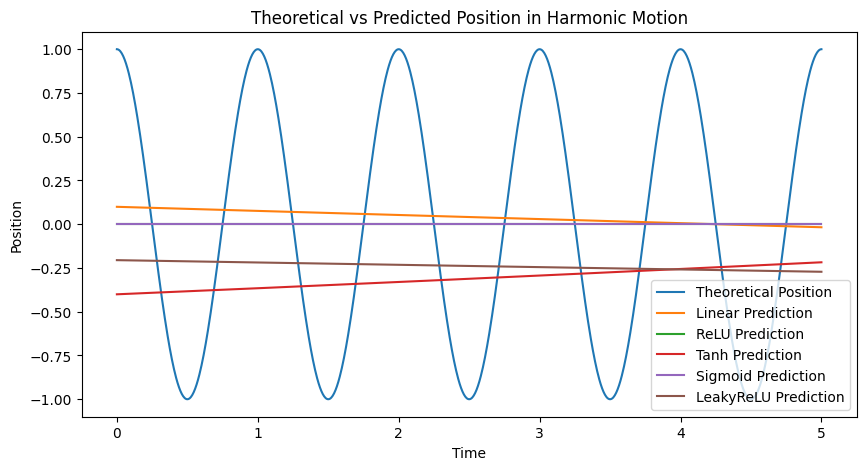

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=100000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}
  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []
    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)
      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse
        cost_history[lr] = costs
    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

X, y = load_data("./Data/train.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

activations = {"Linear": lambda x: x, "ReLU": relu, "Tanh": np.tanh, "Sigmoid": sigmoid, "LeakyReLU": leaky_relu}
lr_values = [0.0001, 0.001, 0.01, 0.1]

models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

predictions = {name: perceptron_predict(X_test, w, b, act) for name, (w, b), act in zip(models, models.values(), activations.values())}
mse_values = {name: np.mean((y_test - y_pred) ** 2) for name, y_pred in predictions.items()}

for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

amplitude, frequency = 1, 1
mass = 10.0
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  for lr, costs in history.items():
    plt.plot(costs, label=f"{name} LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Cost Function over Epochs for Different Models and Learning Rates")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, mass), np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  y_sim = perceptron_predict(X_sim, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores fijos $A, f$, con $t$ variable y al correspondiente
# $x = A\cos{2\pi f t}$

# Input:
- $A$
- $f$
- $t$

MSE (Linear Perceptron): 100.3350
MSE (ReLU Perceptron): 100.3350
MSE (Tanh Perceptron): 288.6350
MSE (Sigmoid Perceptron): 288.6350
MSE (LeakyReLU Perceptron): 100.3350
Linear Perceptron: Weights = [2.39690751 1.24410489 1.82062303], Bias = 1.0518
ReLU Perceptron: Weights = [ 2.67628473 -0.20941055  0.98995233], Bias = 2.3619
Tanh Perceptron: Weights = [137.93957894  69.40871646  35.67987799], Bias = 3.5355
Sigmoid Perceptron: Weights = [140.40112948  69.41100662  35.09408569], Bias = 5.4075
LeakyReLU Perceptron: Weights = [2.97677108 1.15891535 0.78984992], Bias = 0.4926


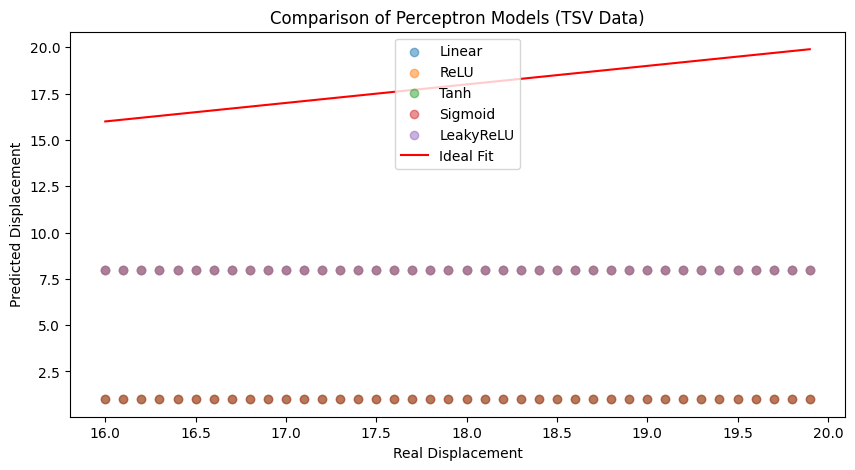

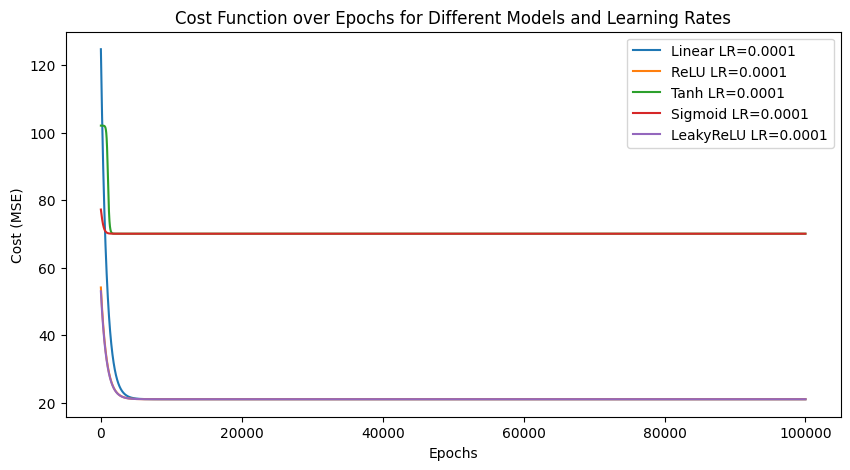

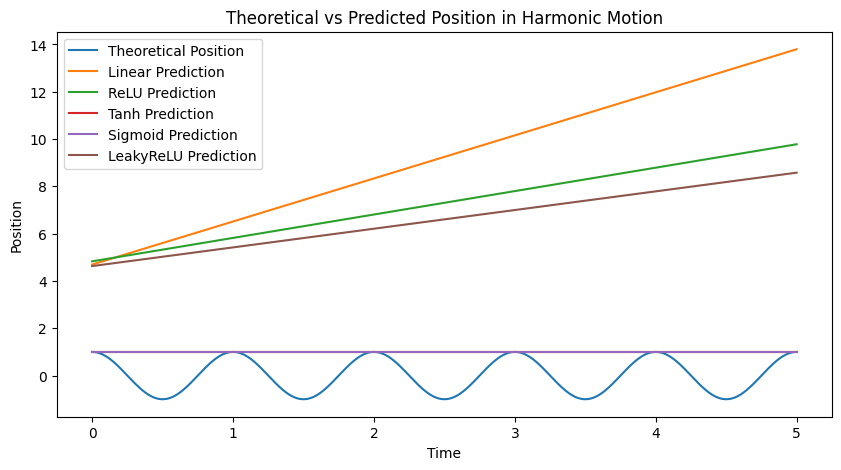

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :3], df[:, 3]

def perceptron_train(X, y, activation, lr_values, epochs=100000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}
  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []
    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)
      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse
        cost_history[lr] = costs
    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

X, y = load_data("./Data/harmonic-oscillator.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

activations = {"Linear": lambda x: x, "ReLU": relu, "Tanh": np.tanh, "Sigmoid": sigmoid, "LeakyReLU": leaky_relu}
lr_values = [0.0001, 0.001, 0.01, 0.1]

models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

predictions = {name: perceptron_predict(X_test, w, b, act) for name, (w, b), act in zip(models, models.values(), activations.values())}
mse_values = {name: np.mean((y_test - y_pred) ** 2) for name, y_pred in predictions.items()}

for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

amplitude, frequency = 1, 1
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  for lr, costs in history.items():
    plt.plot(costs, label=f"{name} LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Cost Function over Epochs for Different Models and Learning Rates")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  y_sim = perceptron_predict(X_sim, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores pseudo aleatoreos $A, f, t$
# y el correspondiente $x = A \cos{2 \pi f t}$

# Input:
- $A$
- $f$
- $\cos{2 \pi f t}$
- $\sin{2 \pi f t}$

MSE (Linear Perceptron): 0.1724
MSE (ReLU Perceptron): 1.2400
MSE (Tanh Perceptron): 0.4602
MSE (Sigmoid Perceptron): 1.2363
MSE (LeakyReLU Perceptron): 2.4146
Linear Perceptron: Weights = [-0.08954392 -0.09409674 -0.00511845  1.75263098], Bias = 0.2353
ReLU Perceptron: Weights = [-24.43789505 -12.10703598  -1.93070448  43.28335947], Bias = -1.0967
Tanh Perceptron: Weights = [-1.58490795 -0.26106509 -1.00163896 13.29742833], Bias = 0.6506
Sigmoid Perceptron: Weights = [-24.19951538 -12.24846065  -1.71528385  43.09508547], Bias = -2.6846
LeakyReLU Perceptron: Weights = [-10.58573669  -4.7779996   -0.97666152  31.97617342], Bias = -2.2131


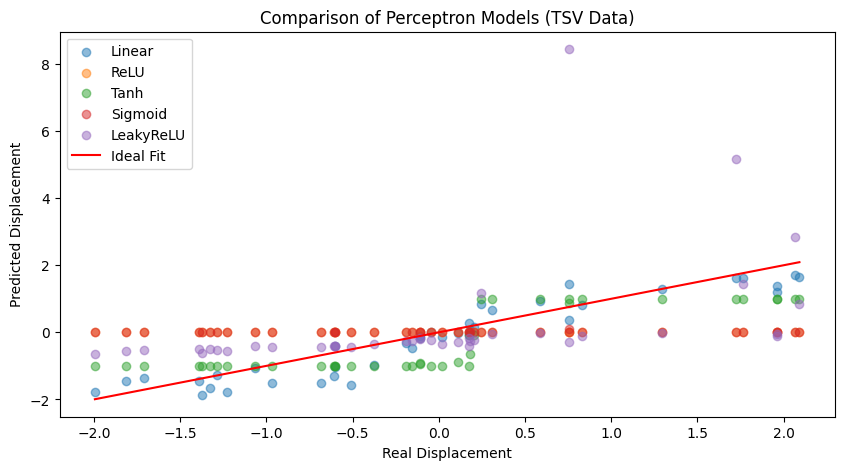

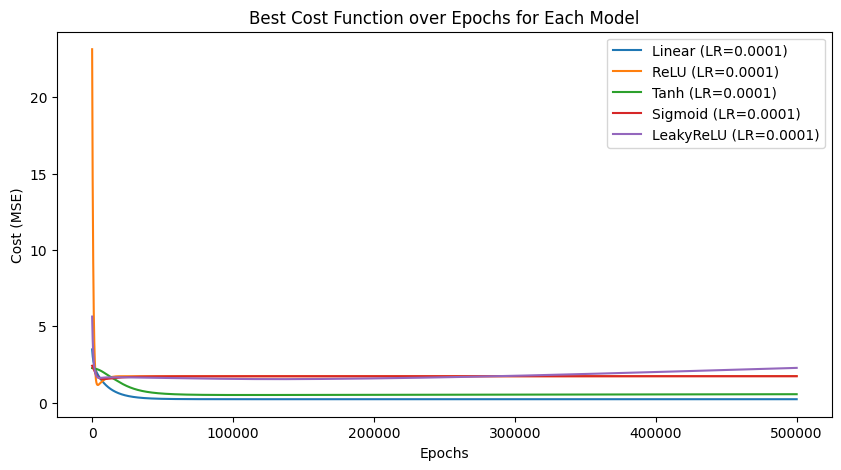

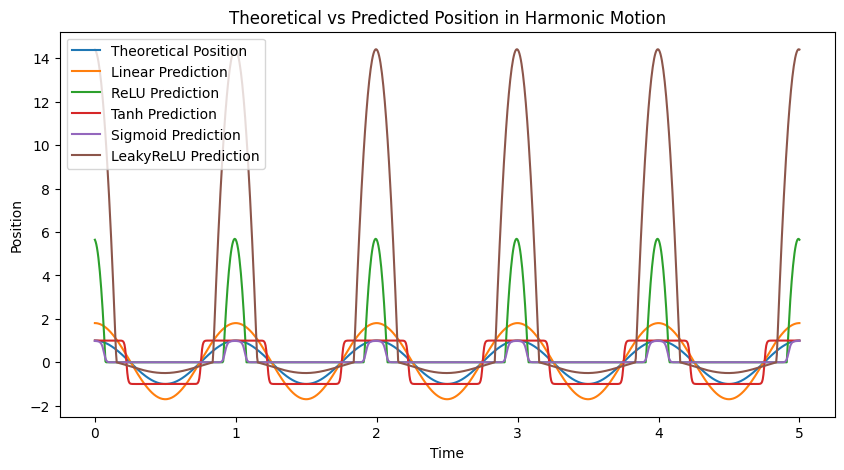

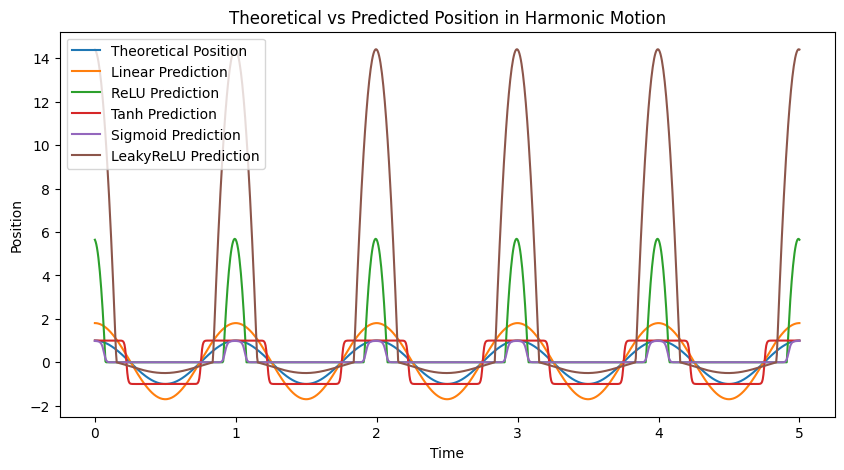

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, 1:4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}

  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []

    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)

      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

        cost_history[lr] = costs

    return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/train.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],  # Amplitude
    X[:, 1],  # Frequency
    np.sin(2 * np.pi * X[:, 1] * X[:, 2]),  # sin(2πft)
    np.cos(2 * np.pi * X[:, 1] * X[:, 2])   # cos(2πft)
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "ReLU": relu,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
  "LeakyReLU": leaky_relu
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amplitude, frequency = 1, 1
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se eliminan los metodos que se alejan por completo i.e $x \to \infty$

/tmp/ipykernel_13806/3848233199.py:7: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


MSE (Linear Perceptron): 0.1727
MSE (Tanh Perceptron): 0.5338
MSE (Sigmoid Perceptron): 1.2400
Linear Perceptron: Weights = [-0.08785424 -0.0927219  -0.0052908   1.75255894], Bias = 0.2301
Tanh Perceptron: Weights = [-105.94698577  -25.0726327   -94.75995388 1176.14176461], Bias = -0.6592
Sigmoid Perceptron: Weights = [-25124.08430339 -12000.11691495  -1691.07580515  42274.45013634], Bias = -0.4893


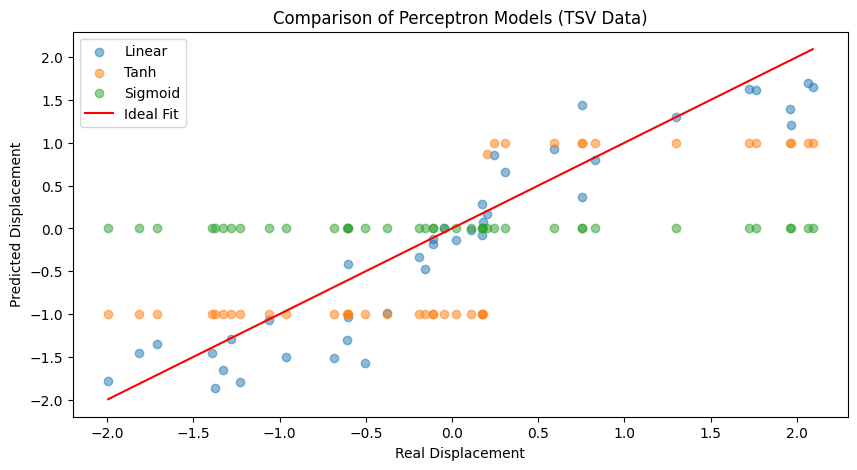

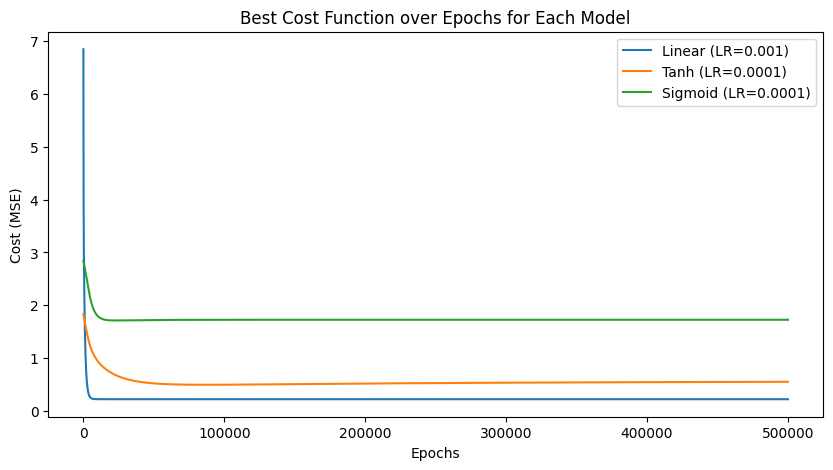

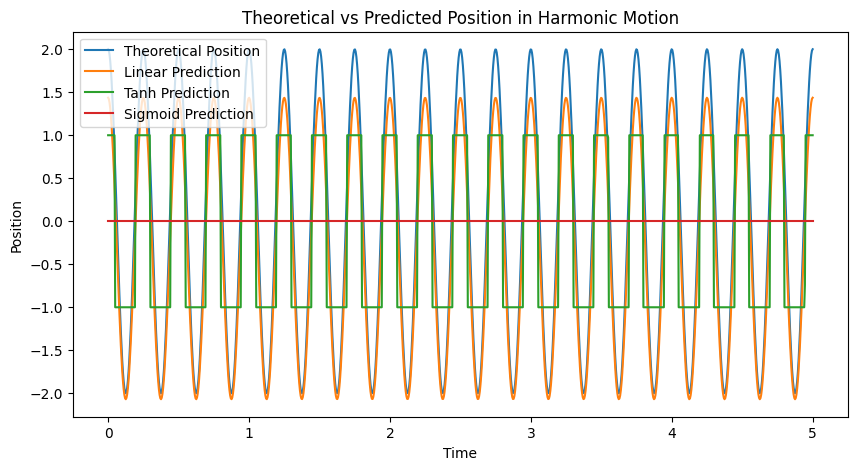

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, 1:4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}

  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []

    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)

      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

    cost_history[lr] = costs

  return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/train.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],  # Amplitude
    X[:, 1],  # Frequency
    np.sin(2 * np.pi * X[:, 1] * X[:, 2]),  # sin(2πft)
    np.cos(2 * np.pi * X[:, 1] * X[:, 2])   # cos(2πft)
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amplitude, frequency = 2.0, 4.0
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores fijos $A, f$, con $t$ variable y al correspondiente
# $x = A\cos{2\pi f t}$

# Input:
- $A$
- $f$
- $\cos{2 \pi f t}$
- $\sin{2 \pi f t}$

/tmp/ipykernel_13806/2374838687.py:7: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


MSE (Linear Perceptron): 0.0000
MSE (Tanh Perceptron): 0.0069
MSE (Sigmoid Perceptron): 0.2804
Linear Perceptron: Weights = [-3.43834341e-01  6.87590297e-02 -7.89080865e-16  1.00000013e+00], Bias = 0.3095
Tanh Perceptron: Weights = [-8.28157112e-01 -3.74072937e-01  6.03291918e-09  1.45854165e+00], Bias = 1.0138
Sigmoid Perceptron: Weights = [-7.47069160e+01 -3.78500205e+01  9.29224442e-02  1.80854607e+02], Bias = -2.4648


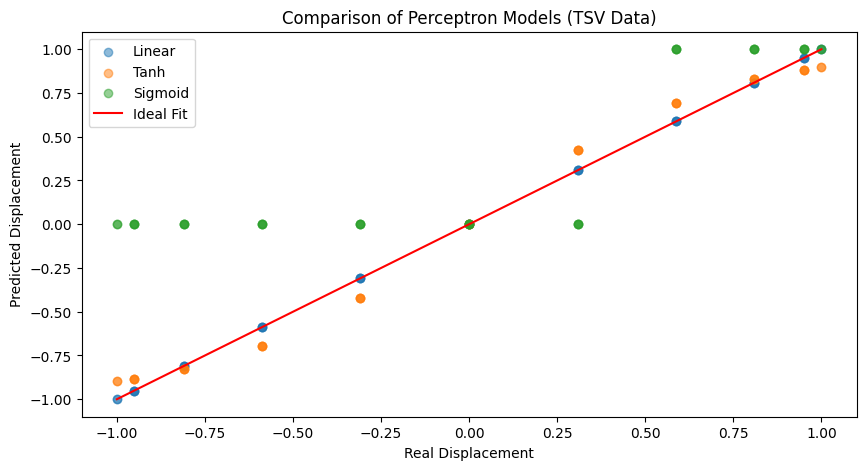

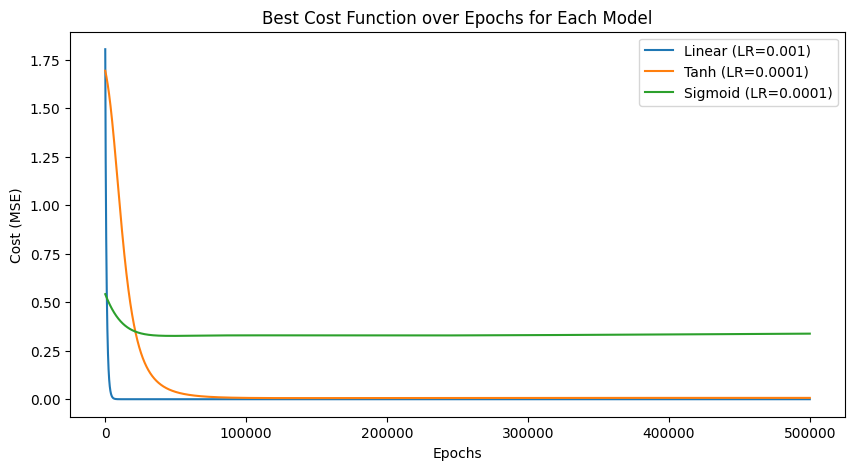

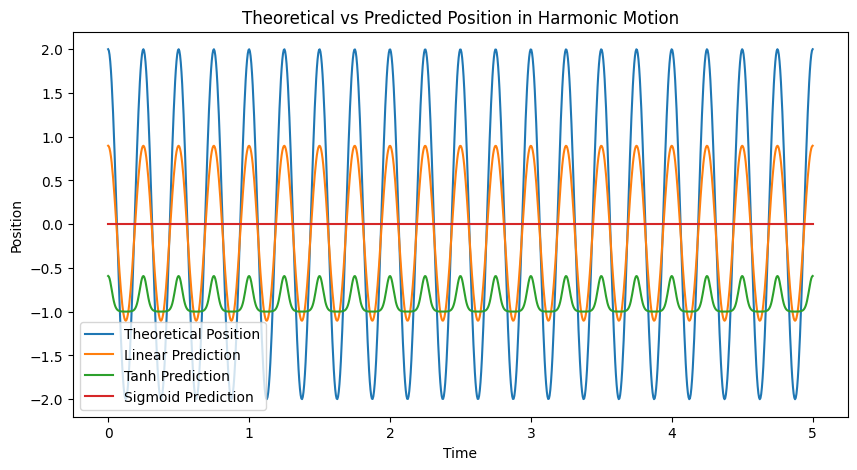

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, 1:4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}

  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []

    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)

      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

    cost_history[lr] = costs

  return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/harmonic-oscillator.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],  # Amplitude
    X[:, 1],  # Frequency
    np.sin(2 * np.pi * X[:, 1] * X[:, 2]),  # sin(2πft)
    np.cos(2 * np.pi * X[:, 1] * X[:, 2])   # cos(2πft)
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amplitude, frequency = 2.0, 4.0
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores pseudo aleatoreos $A, f, m, t$
# y el correspondiente $x = A \cos{2 \pi f t}$

# Input:
- $A$
- $f$
- $\cos{2 \pi f t}$
- $\sin{2 \pi f t}$
- $m$

/home/oel/.venv/jupy3/lib/python3.11/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_13806/1191392579.py:27: RuntimeWarning: overflow encountered in square
  mse = np.mean(error ** 2)
/tmp/ipykernel_13806/1191392579.py:25: RuntimeWarning: overflow encountered in matmul
  w += lr * (error @ X) / len(y)
/tmp/ipykernel_13806/1191392579.py:25: RuntimeWarning: invalid value encountered in matmul
  w += lr * (error @ X) / len(y)
/tmp/ipykernel_13806/1191392579.py:25: RuntimeWarning: invalid value encountered in add
  w += lr * (error @ X) / len(y)
/tmp/ipykernel_13806/1191392579.py:7: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


MSE (Linear Perceptron): 0.1728
MSE (Tanh Perceptron): 0.5291
MSE (Sigmoid Perceptron): 1.2400
Linear Perceptron: Weights = [ 0.00176314 -0.08797719 -0.09272285 -0.00578739  1.75266426], Bias = 0.2212
Tanh Perceptron: Weights = [-0.17162278 -1.16663666  0.15134002 -0.94278457 13.17283612], Bias = -0.4211
Sigmoid Perceptron: Weights = [-57.69948514 -24.79415053 -13.28658777  -2.53163769  43.53710653], Bias = -0.0978


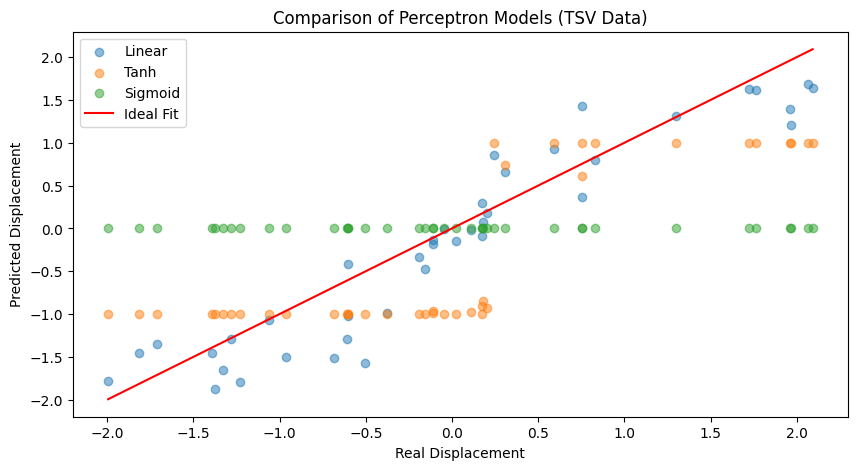

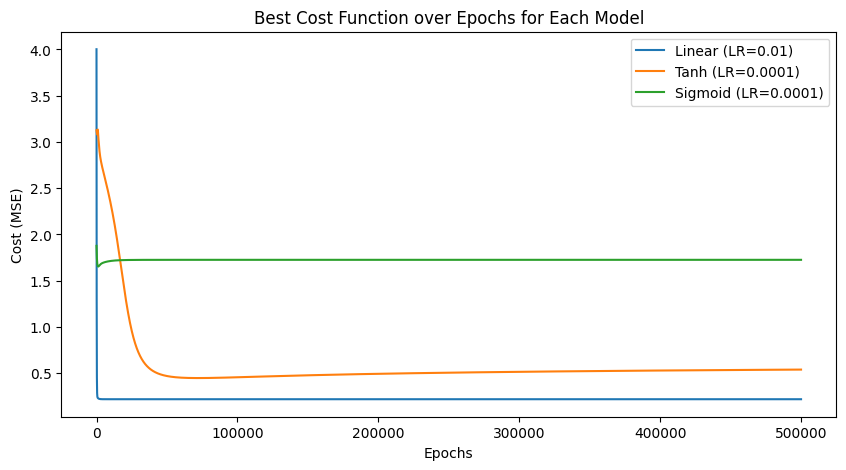

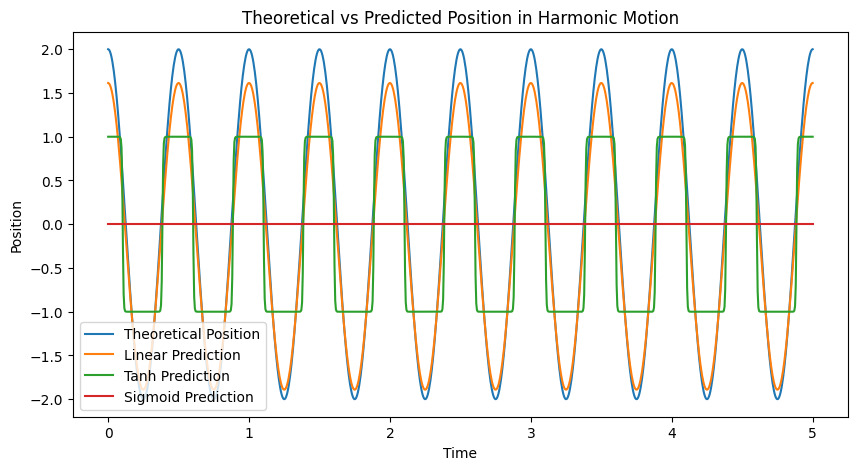

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, :4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}

  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []

    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)

      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

    cost_history[lr] = costs

  return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/train.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],  # Amplitude
    X[:, 1],  # Amplitude
    X[:, 2],  # Frequency
    np.sin(2 * np.pi * X[:, 2] * X[:, 3]),  # sin(2πft)
    np.cos(2 * np.pi * X[:, 2] * X[:, 3])   # cos(2πft)
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amplitude, frequency, mass = 2.0, 2.0, 1
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, mass), np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()

# Se entrena con valores fijos $A, f$, con $t$ variable y al correspondiente
# $x = A\cos{2\pi f t}$

# Input:
- $A$
- $f$
- $\cos{2 \pi f t}$
- $\sin{2 \pi f t}$

/tmp/ipykernel_13806/3395342926.py:7: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1 / (1 + np.exp(-x))


MSE (Linear Perceptron): 0.0000
MSE (Tanh Perceptron): 0.0069
MSE (Sigmoid Perceptron): 0.2804
Linear Perceptron: Weights = [ 4.05526272e-01 -1.25736863e+00 -7.89266153e-16  1.00000013e+00], Bias = 0.2232
Tanh Perceptron: Weights = [-1.08599611e-01  2.25641601e+00 -8.91300515e-09  1.45859692e+00], Bias = -1.0210
Sigmoid Perceptron: Weights = [-7.59801410e+01 -3.75074769e+01 -3.97829790e-03  1.81416297e+02], Bias = 0.7238


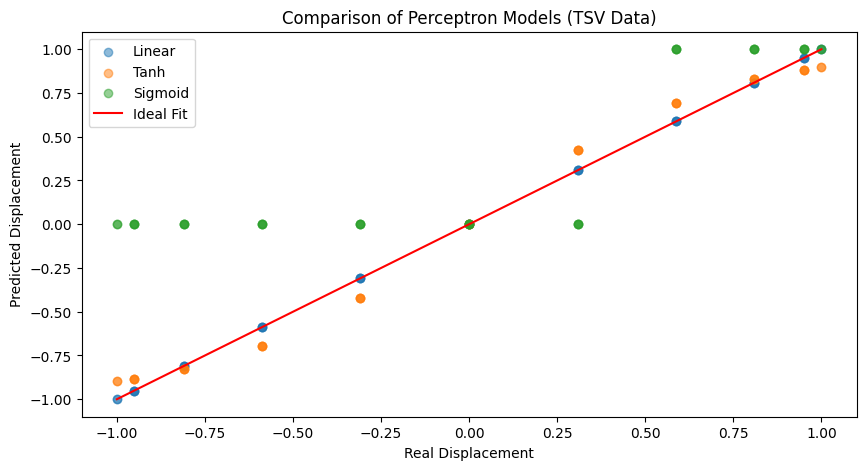

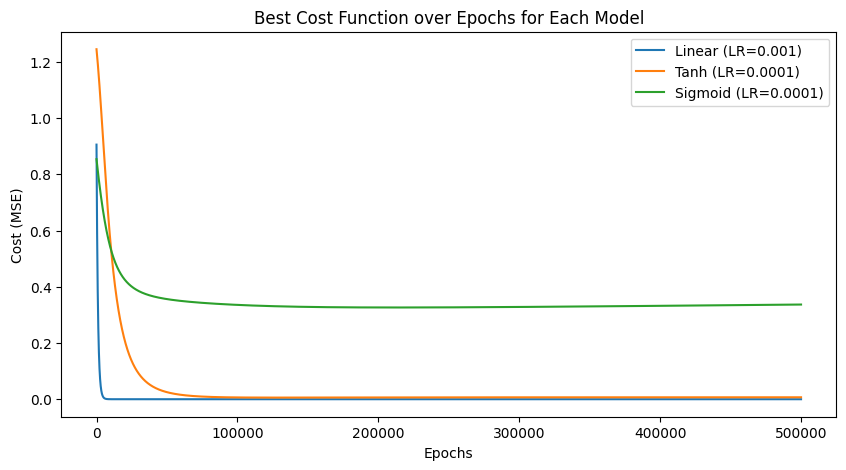

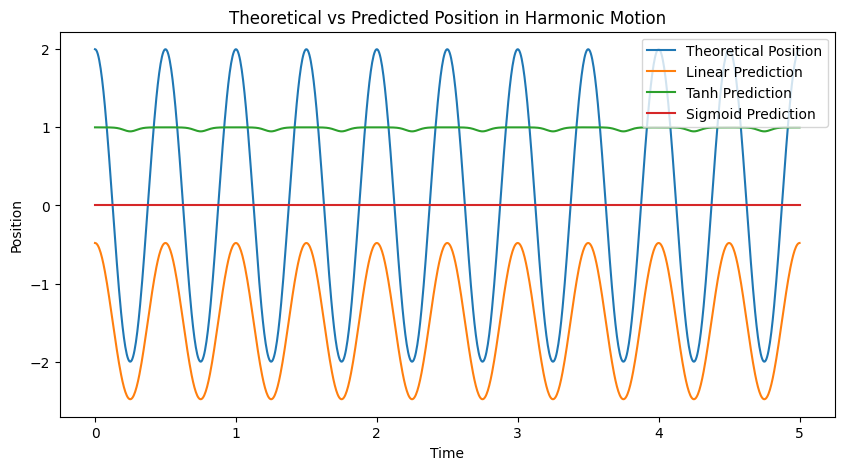

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation functions
relu = lambda x: np.maximum(0, x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
leaky_relu = lambda x: np.where(x > 0, x, 0.01 * x)

def load_data(file_path):
  df = pd.read_csv(file_path, sep="\t").values
  return df[:, 1:4], df[:, 4]

def perceptron_train(X, y, activation, lr_values, epochs=500000):
  best_lr, best_w, best_b, lowest_mse = None, None, None, float('inf')
  cost_history = {}

  for lr in lr_values:
    w, b = np.random.randn(X.shape[1]), np.random.randn()
    costs = []

    for _ in range(epochs):
      y_pred = activation(X @ w + b)
      error = y - y_pred
      w += lr * (error @ X) / len(y)
      b += lr * error.mean()
      mse = np.mean(error ** 2)
      costs.append(mse)

      if mse < lowest_mse:
        best_lr, best_w, best_b, lowest_mse = lr, w, b, mse

    cost_history[lr] = costs

  return best_w, best_b, cost_history

def perceptron_predict(X, w, b, activation):
  return activation(X @ w + b)

# Load and split data
X, y = load_data("./Data/harmonic-oscillator.tsv")
split = int(0.8 * len(y))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Transforming time into sin and cos components
def transform_features(X):
  return np.column_stack((
    X[:, 0],  # Amplitude
    X[:, 1],  # Frequency
    np.sin(2 * np.pi * X[:, 1] * X[:, 2]),  # sin(2πft)
    np.cos(2 * np.pi * X[:, 1] * X[:, 2])   # cos(2πft)
  ))

X_train_transformed = transform_features(X_train)
X_test_transformed = transform_features(X_test)

# Activation functions
activations = {
  "Linear": lambda x: x,
  "Tanh": np.tanh,
  "Sigmoid": sigmoid,
}
lr_values = [0.0001, 0.001, 0.01, 0.05, 0.1]

# Train models
models, cost_histories = {}, {}
for name, act in activations.items():
  w, b, cost_history = perceptron_train(X_train_transformed, y_train, act, lr_values)
  models[name] = (w, b)
  cost_histories[name] = cost_history

# Predictions
predictions = {
  name: perceptron_predict(X_test_transformed, *models[name], activations[name])
  for name in models
}

# Calculate MSE
mse_values = {
  name: np.mean((y_test - y_pred) ** 2)
  for name, y_pred in predictions.items()
}

# MSE Results
for name, mse in mse_values.items():
  print(f"MSE ({name} Perceptron): {mse:.4f}")

for name, (w, b) in models.items():
  print(f"{name} Perceptron: Weights = {w}, Bias = {b:.4f}")

# Theoretical harmonic position (for comparison)
amplitude, frequency = 2.0, 2.0
t_values = np.linspace(0, 5, 1000)
th_position = amplitude * np.cos(2 * np.pi * frequency * t_values)

# Scatter plot of predictions vs real values
plt.figure(figsize=(10, 5))
for name, y_pred in predictions.items():
  plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r', label="Ideal Fit")
plt.xlabel("Real Displacement")
plt.ylabel("Predicted Displacement")
plt.legend()
plt.title("Comparison of Perceptron Models (TSV Data)")
plt.show()

# Cost function over epochs (only best LR per model)
plt.figure(figsize=(10, 5))
for name, history in cost_histories.items():
  best_lr = min(history, key=lambda lr: history[lr][-1])  # Find LR with lowest final cost
  plt.plot(history[best_lr], label=f"{name} (LR={best_lr})")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.legend()
plt.title("Best Cost Function over Epochs for Each Model")
plt.show()

# Theoretical vs predicted position in harmonic motion
plt.figure(figsize=(10, 5))
plt.plot(t_values, th_position, label="Theoretical Position")
for name, (w, b) in models.items():
  X_sim = np.column_stack((np.full_like(t_values, amplitude), np.full_like(t_values, frequency), t_values))
  X_sim_transformed = transform_features(X_sim)
  y_sim = perceptron_predict(X_sim_transformed, w, b, activations[name])
  plt.plot(t_values, y_sim, label=f"{name} Prediction")

plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Theoretical vs Predicted Position in Harmonic Motion")
plt.show()